In a basic **circle packing chart** with one level of hierarchy, each entity of your dataset is represented by a circle and the circle sizes are arranged based on the values of the entities. This chart type is similar to a bar plot: each category is displayed as circles(intead of bars) and their sizes show the value(instead of bar lengths).  

You can draw a circle packing chart in python with the **circlify** library. The `circlify()` function of the library takes the following parameters to create circle packing:  
* `data` : (necessary) A list of positive values sorted from largest to smallest
* `target_enclosure` : (optional) A target enclosure where the packed circles should fit (default to the unit circle (0, 0, 1))
* `show_enclosure` : (optional) A boolean indicating if the target enclosure should be appended to the output (default to False)  

After you create packed circles, you can easily draw a graph with the `bubbles()` function.

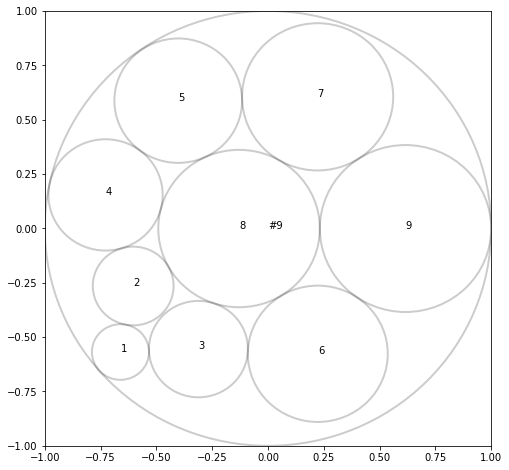

In [11]:
# import libraries
from pprint import pprint
import circlify

# create packed circles with given data
circles = circlify.circlify([9, 8, 7, 6, 5, 4, 3, 2, 1], show_enclosure=True, target_enclosure=circlify.Circle(x=0, y=0, r=1))

# print circles
#pprint(circles)

# draw a graph of the packed circles
circlify.bubbles(circles=circles) 